# Part 1 : Exploratory Data Analysis

In [47]:
import sys 
import csv 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
df = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/hw5_treasury yield curve data.csv')
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [44]:
df = df.drop(['Date'],axis=1)
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [45]:
#check N/A

print(np.sum(df.isna().sum()!=0))

0


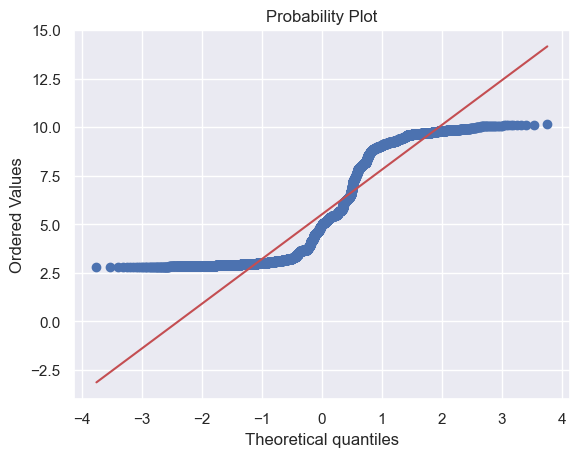

In [91]:
# QQ-plot for target

stats.probplot(df['Adj_Close'],dist ='norm',plot=plt)
plt.show()

/Users/han-eunbi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


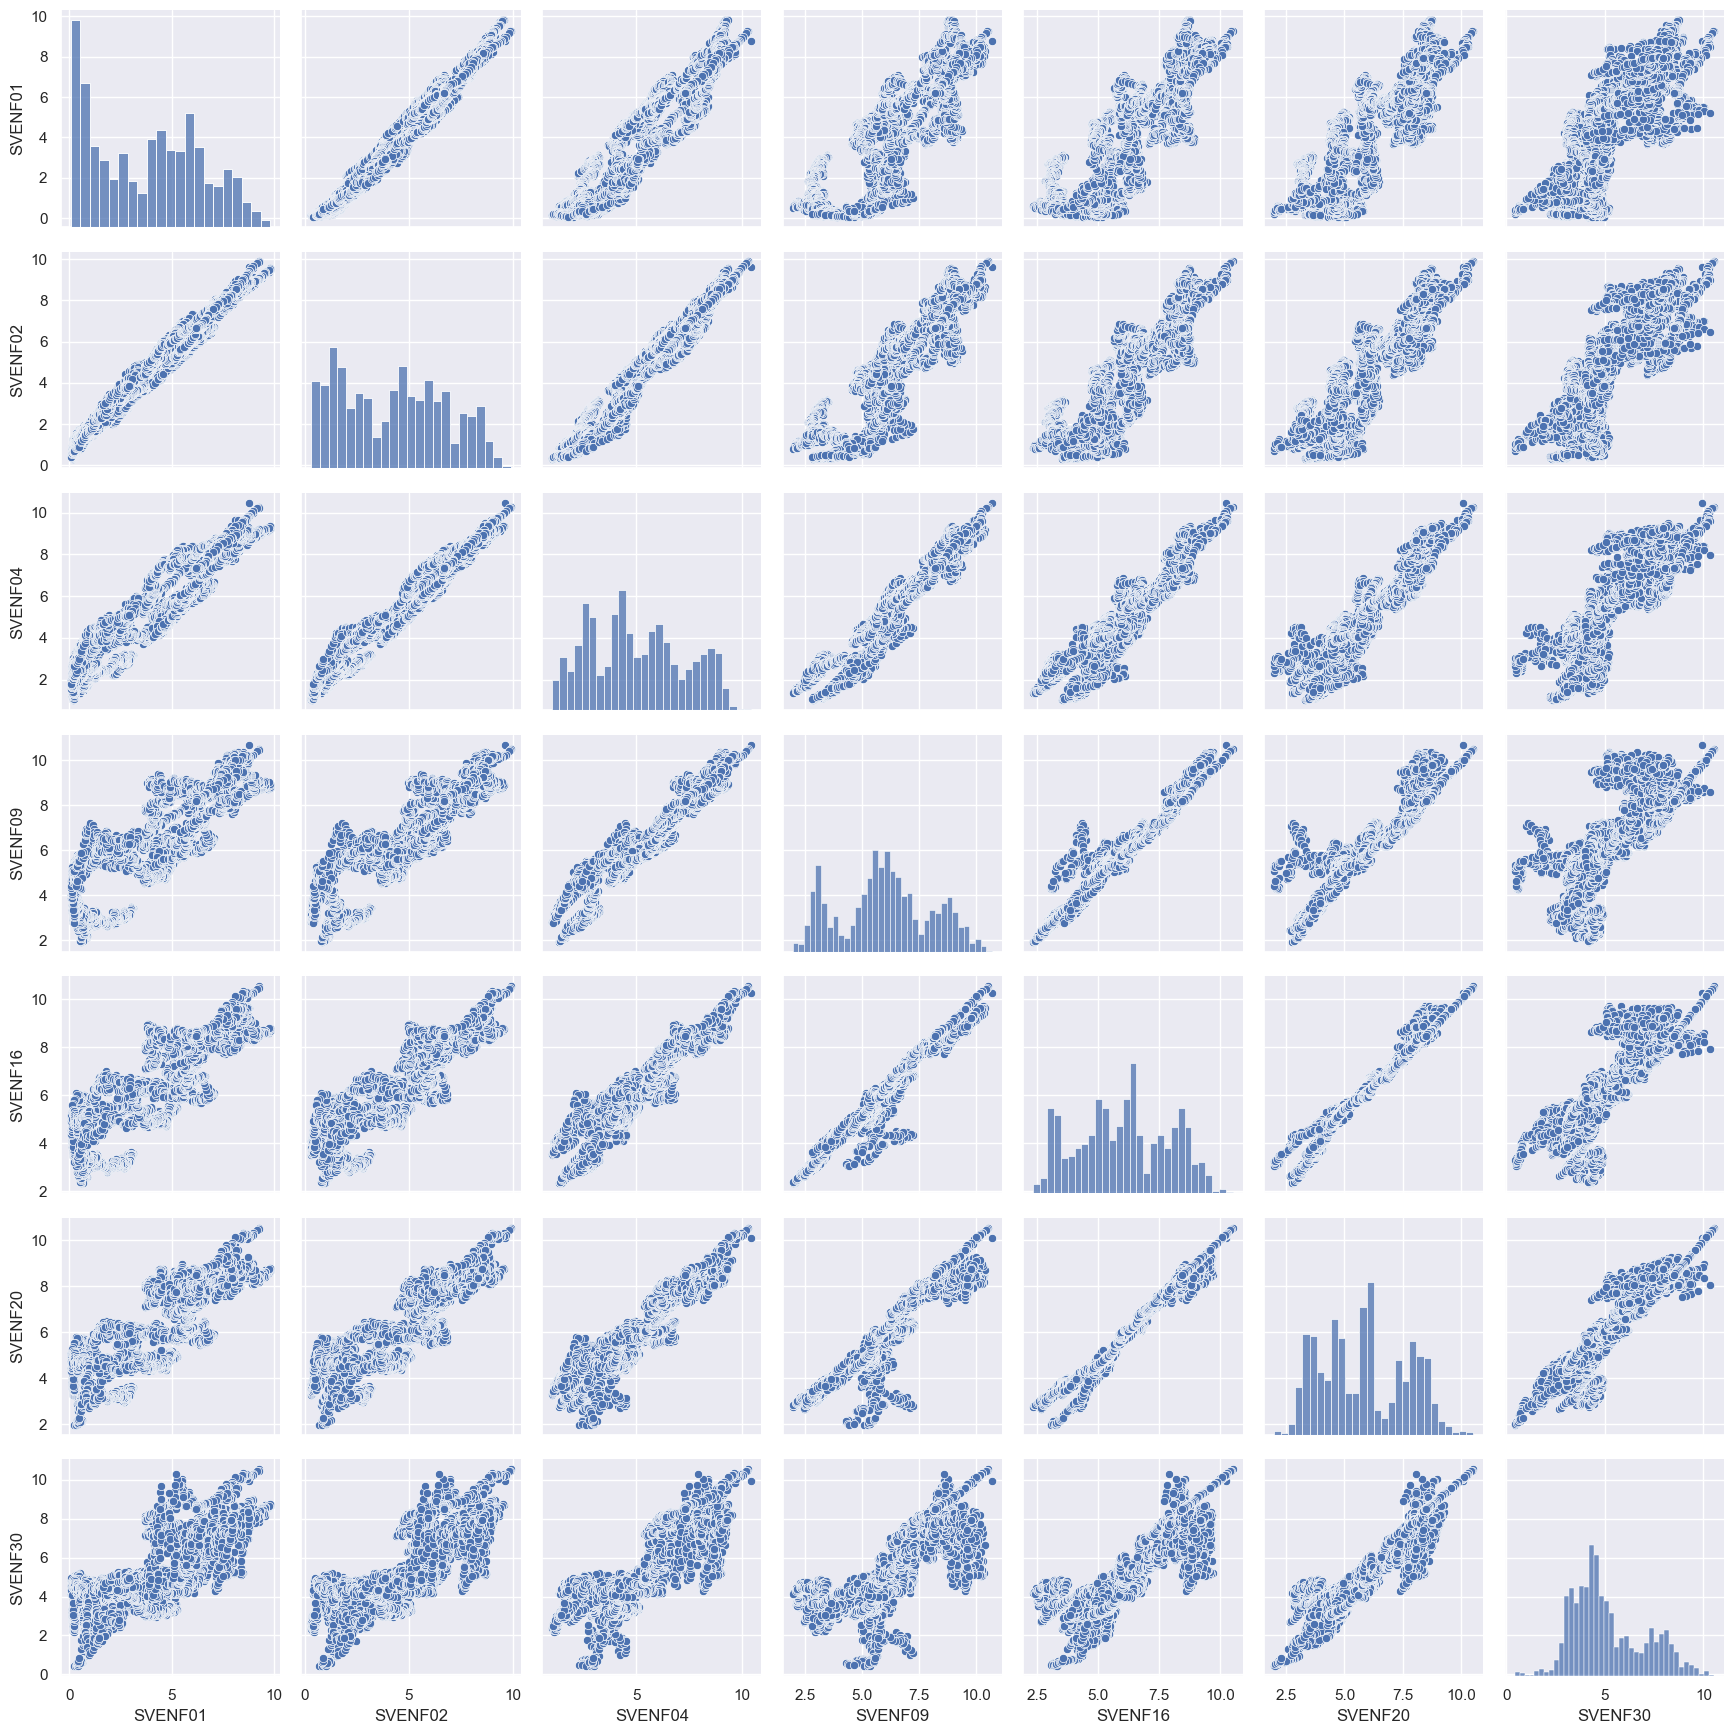

In [49]:
# scatterplot

columns = ['SVENF01','SVENF02','SVENF04','SVENF09','SVENF16','SVENF20','SVENF30']


sns.pairplot(df[columns],size = 2.5)
plt.tight_layout()
plt.show()


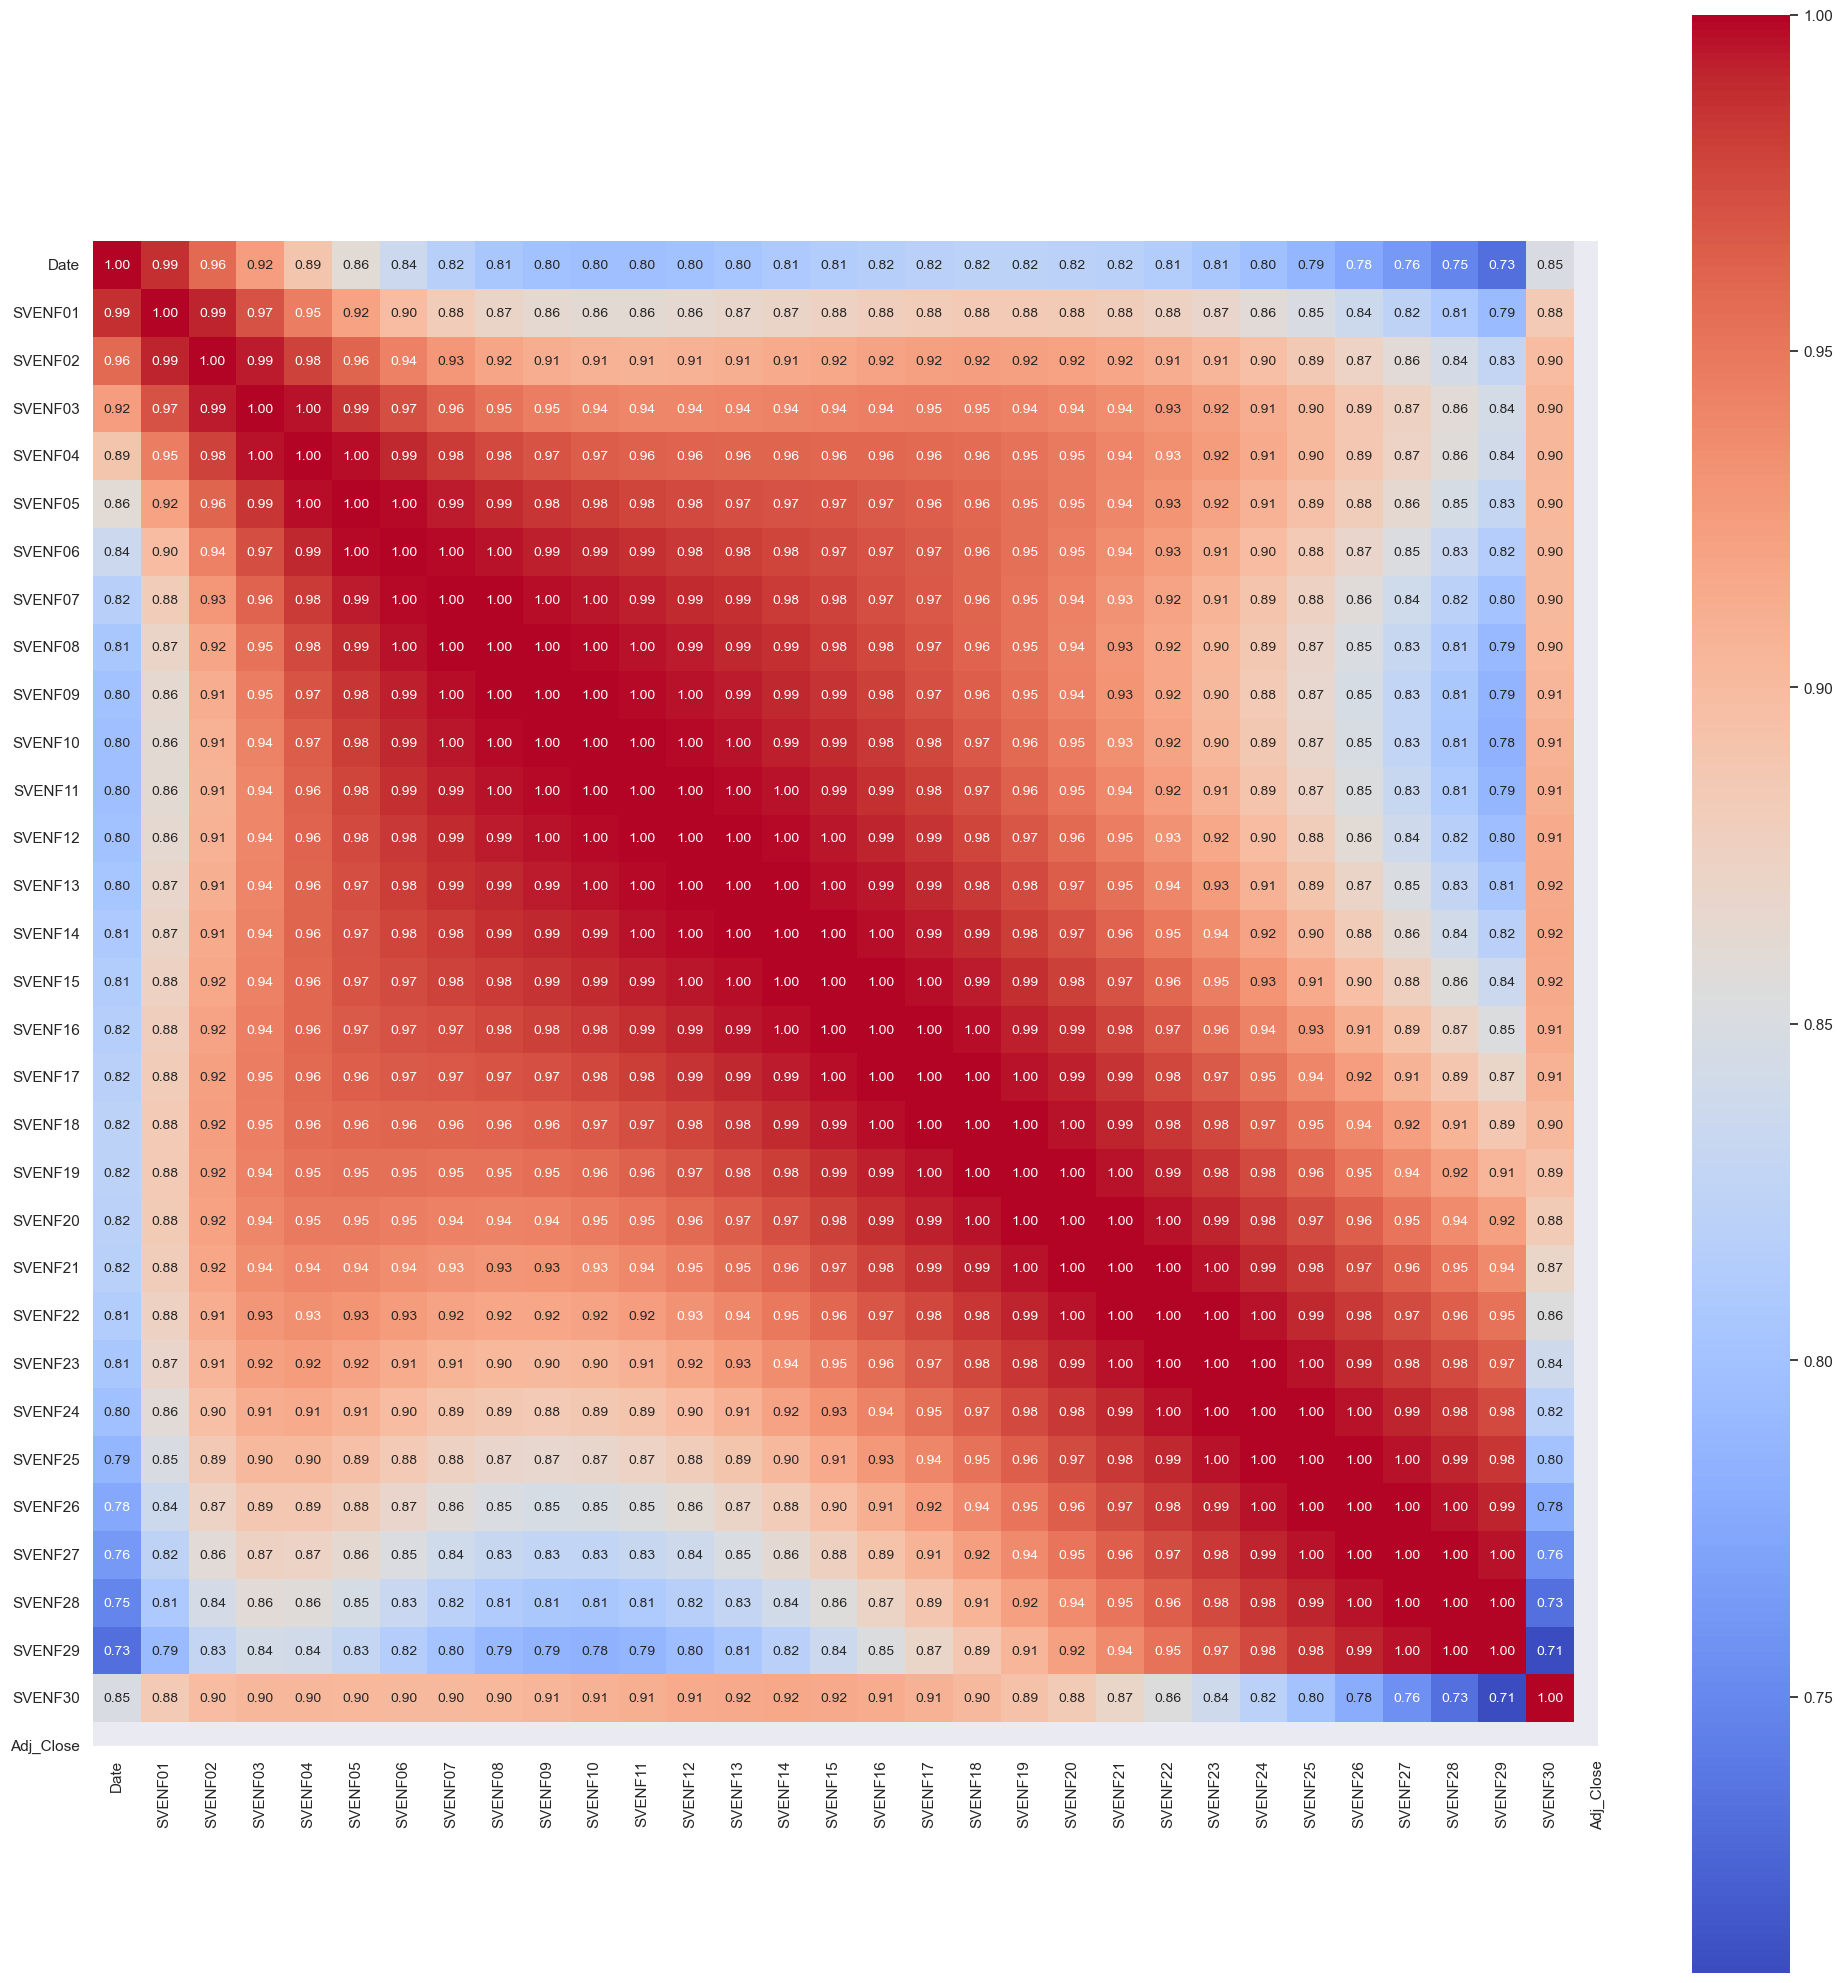

In [50]:
corMat = df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(corMat,annot=True,cmap='coolwarm',square = True,cbar = True, 
           fmt = '.2f',annot_kws={'size':10},xticklabels=cols,yticklabels=cols)
plt.tight_layout()
plt.show()

In [51]:
# split data 

X = df.iloc[:,:-1].values
y = df['Adj_Close'].values

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42)

In [53]:
# standardized ata
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
y_train_std = sc_y.fit_transform(y_train.reshape(-1,1))
y_test_std = sc_y.transform(y_test.reshape(-1,1))

# Part 2 : Perform PCA

In [93]:
pca_all = PCA(n_components=None)
X_train_pca = pca_all.fit_transform(X_train_std)
np.set_printoptions(formatter={'float':'{:0.5f}'.format})
print("Explained variance ratio : \n",pca_all.explained_variance_ratio_)

Explained variance ratio : 
 [0.93180 0.04077 0.02184 0.00485 0.00066 0.00007 0.00001 0.00000 0.00000
 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000
 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000
 0.00000 0.00000 0.00000]


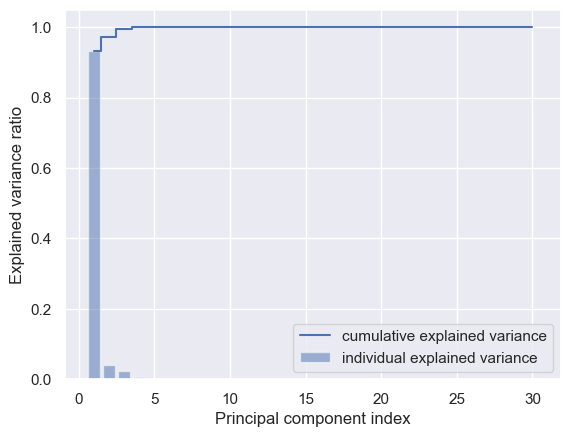

In [57]:
plt.bar(range(1, 31), pca_all.explained_variance_ratio_, 
        alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 31), np.cumsum(pca_all.explained_variance_ratio_), 
         where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [61]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("Explained variance ratio : ",pca.explained_variance_ratio_)

Explained variance ratio :  [0.932 0.041 0.022]


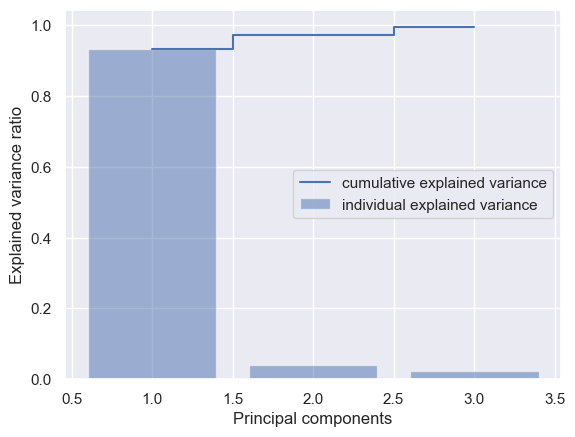

In [64]:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, 
        align='center',label='individual explained variance')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), 
         where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

# Part 3 : Linear Regression vs SVM regressor

- Linear Regressiln : fit original dataset (30 attr), pca transformed dataset(3pc)
- calculate R2 score and RMSE for both train and test sets

- SVM regressor : model to both dataset


### Linear Regression

In [68]:
#original dataseta
lr = LinearRegression()
lr.fit(X_train_std,y_train_std)
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print(lr.coef_)

[[-5.153 53.411 -235.179 527.390 -590.382 190.728 237.197 -244.506
  -35.384 253.449 -225.768 155.308 -0.687 -66.297 -73.080 -5.630 -225.179
  160.054 100.576 97.661 409.695 -281.265 127.635 -303.189 -576.976
  173.701 75.041 616.769 -59.465 -251.219]]


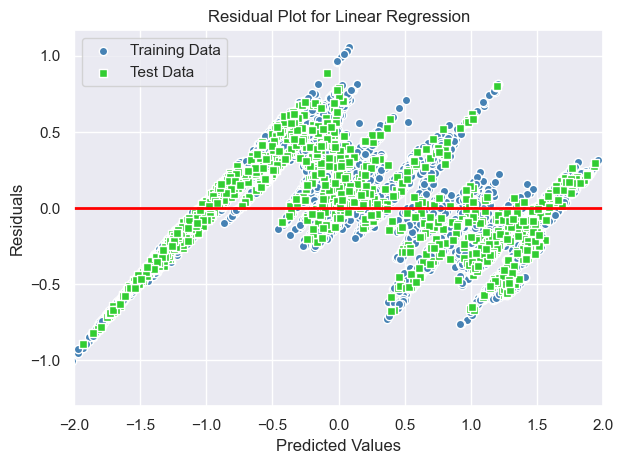

In [71]:
plt.scatter(y_train_pred,y_train_pred-y_train_std,
           c='steelblue',marker='o',edgecolor='white',
           label = 'Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test_std,
           c='limegreen',marker='s',edgecolor='white',
           label='Test Data')
plt.xlabel ('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual Plot for Linear Regression')
plt.hlines(y=0,xmin=-5,xmax=5,color='red',lw=2)
plt.xlim([-2,2])
plt.tight_layout()
plt.show()


In [74]:
#RMSE
print("RMSE score for train data: %.3f, test data: %.3f" % (mean_squared_error(y_train_std,y_train_pred,squared=False),
                                             mean_squared_error(y_test_std,y_test_pred,squared=False)))

 
#R2
print("R2 score for train data: %.3f, test data: %.3f" %(r2_score(y_train_std,y_train_pred),
                                          r2_score(y_test_std,y_test_pred)))

RMSE score for train data: 0.313, test data: 0.315
R2 score for train data: 0.902, test data: 0.904


In [75]:
# pca transformed data

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

trans_lr = LinearRegression()
trans_lr.fit(X_train_pca,y_train_std)

y_train_pred_trans = trans_lr.predict(X_train_pca)
y_test_pred_trans = trans_lr.predict(X_test_pca)

print(trans_lr.coef_)

[[-0.171 -0.196 0.107]]


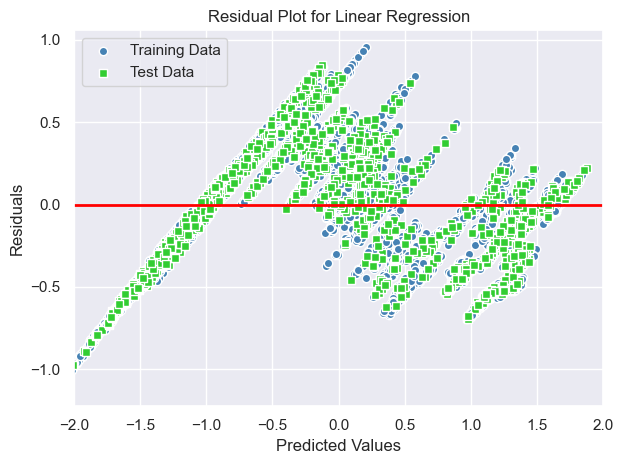

In [76]:
plt.scatter(y_train_pred_trans,y_train_pred_trans-y_train_std,
           c='steelblue',marker='o',edgecolor='white',
           label = 'Training Data')
plt.scatter(y_test_pred_trans,y_test_pred_trans-y_test_std,
           c='limegreen',marker='s',edgecolor='white',
           label='Test Data')
plt.xlabel ('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual Plot for Linear Regression')
plt.hlines(y=0,xmin=-5,xmax=5,color='red',lw=2)
plt.xlim([-2,2])
plt.tight_layout()
plt.show()


In [77]:
#RMSE
print("RMSE score for train data: %.3f, test data: %.3f" % (mean_squared_error(y_train_std,y_train_pred_trans,squared=False),
                                             mean_squared_error(y_test_std,y_test_pred_trans,squared=False)))

 
#R2
print("R2 score for train data: %.3f, test data: %.3f" %(r2_score(y_train_std,y_train_pred_trans),
                                          r2_score(y_test_std,y_test_pred_trans)))

RMSE score for train data: 0.364, test data: 0.372
R2 score for train data: 0.867, test data: 0.866


### SVM

/Users/han-eunbi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


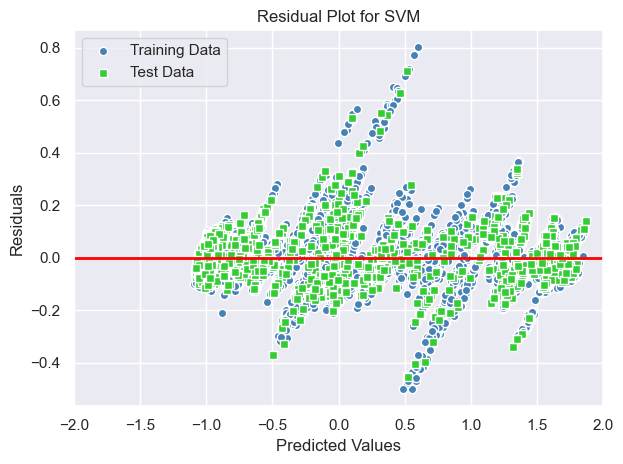

RMSE score train: 0.103, test: 0.104
R2 score train: 0.989, test: 0.990


In [85]:
# SVM on original dataset
SVM = svm.SVR(kernel='rbf')
SVM.fit(X_train_std,y_train_std)
y_train_pred = SVM.predict(X_train_std)
y_test_pred = SVM.predict(X_test_std)

plt.scatter(y_train_pred,y_train_pred-y_train_std.reshape(y_train_std.shape[0]),
           c='steelblue',marker='o',edgecolor='white',
           label = 'Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test_std.reshape(y_test_std.shape[0]),
           c='limegreen',marker='s',edgecolor='white',
           label='Test Data')
plt.xlabel ('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual Plot for SVM')
plt.hlines(y=0,xmin=-2,xmax=2,color='red',lw=2)
plt.xlim([-2,2])
plt.tight_layout()
plt.show()

#RMSE
print("RMSE score train: %.3f, test: %.3f" % (mean_squared_error(y_train_std,y_train_pred,squared=False),
                                             mean_squared_error(y_test_std,y_test_pred,squared=False)))

 
#R2
print("R2 score train: %.3f, test: %.3f" %(r2_score(y_train_std,y_train_pred),
                                          r2_score(y_test_std,y_test_pred)))


/Users/han-eunbi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


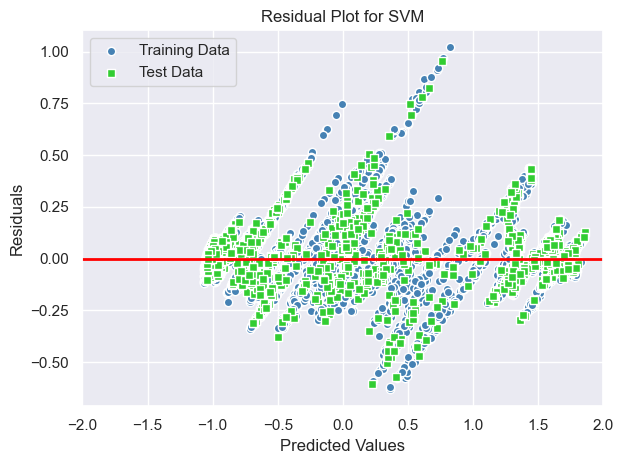

RMSE score train: 0.145, test: 0.149
R2 score train: 0.979, test: 0.979


In [88]:
# transformed Data
SVM_trans = svm.SVR(kernel='rbf')
SVM_trans.fit(X_train_pca,y_train_std)
y_train_pred_trans = SVM_trans.predict(X_train_pca)
y_test_pred_trans = SVM_trans.predict(X_test_pca)

plt.scatter(y_train_pred_trans,y_train_pred_trans-y_train_std.reshape(y_train_std.shape[0]),
           c='steelblue',marker='o',edgecolor='white',
           label = 'Training Data')
plt.scatter(y_test_pred_trans,y_test_pred_trans-y_test_std.reshape(y_test_std.shape[0]),
           c='limegreen',marker='s',edgecolor='white',
           label='Test Data')
plt.xlabel ('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual Plot for SVM')
plt.hlines(y=0,xmin=-2,xmax=2,color='red',lw=2)
plt.xlim([-2,2])
plt.tight_layout()
plt.show()

#RMSE
print("RMSE score train: %.3f, test: %.3f" % (mean_squared_error(y_train_std,y_train_pred_trans,squared=False),
                                             mean_squared_error(y_test_std,y_test_pred_trans,squared=False)))


#R2
print("R2 score train: %.3f, test: %.3f" %(r2_score(y_train_std,y_train_pred_trans),
                                          r2_score(y_test_std,y_test_pred_trans)))

In [89]:
print("My name is Eunbi Han")
print("My NetID is: eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Eunbi Han
My NetID is: eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
